In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("accident data.csv")
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

18

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'],format='%d-%m-%Y')

In [10]:
df['Month'] = df['Accident Date'].dt.month_name()

# EDA

## Horizontal Chart 

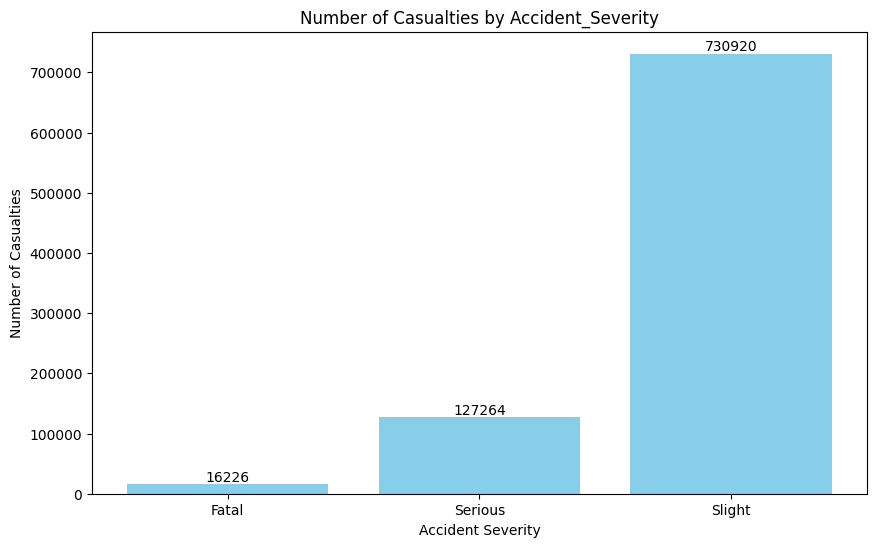

In [11]:
acci_sever = df.groupby('Accident_Severity')['Number_of_Casualties'].sum().sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.bar(acci_sever.index,acci_sever.values, color='skyblue')

for i,value in enumerate(acci_sever):
    plt.text(i,value+0.5,str(value),ha='center', va='bottom')
plt.title("Number of Casualties by Accident_Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Casualties")
plt.show()

# Line Chart 

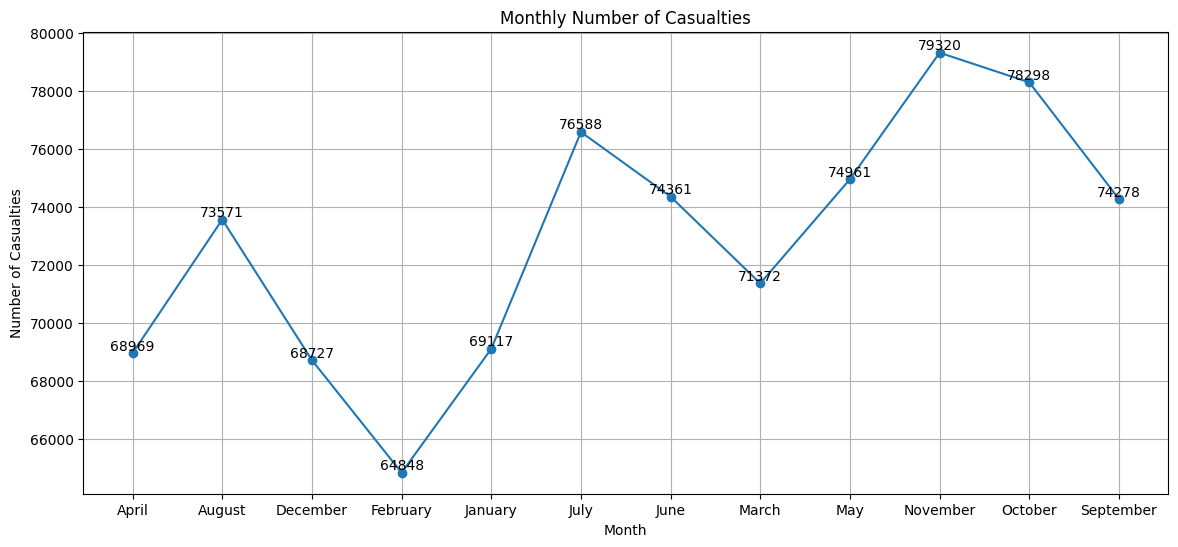

In [12]:
monthly = df.groupby('Month')['Number_of_Casualties'].sum()

plt.figure(figsize=(14,6))
plt.plot(monthly.index, monthly.values, marker='o', linestyle='solid')
for i,value in enumerate(monthly.values):
    plt.text(i,value + 5,str(value), ha='center',va='bottom')
plt.title("Monthly Number of Casualties")
plt.xlabel('Month')
plt.ylabel('Number of Casualties')
plt.grid()
plt.show()


## Horizontal Bar Chart 

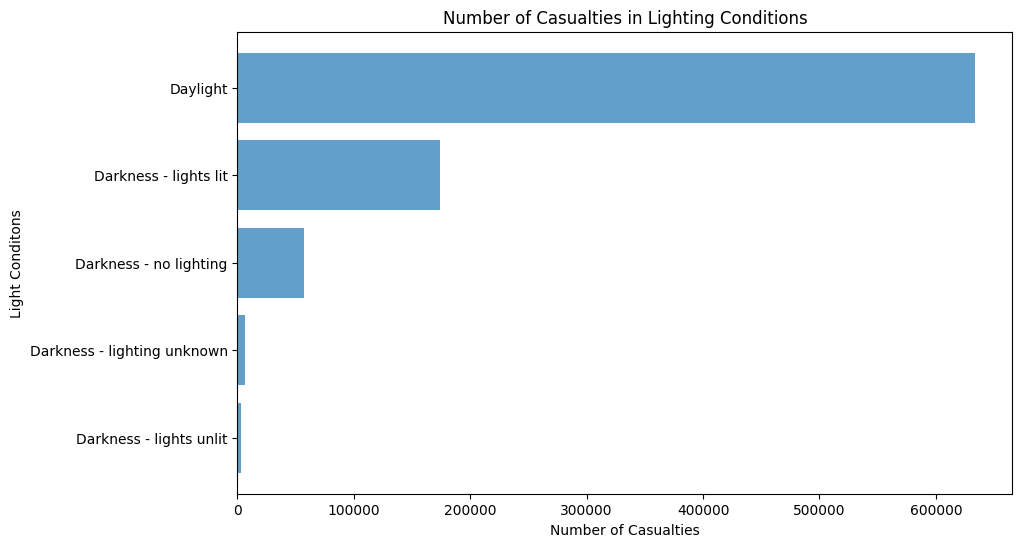

In [13]:
light_con = df.groupby('Light_Conditions')['Number_of_Casualties'].sum().sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.barh(light_con.index, light_con.values,alpha=0.7)
#for i, value in enumerate(light_con.values):
    #plt.text(i,value, str(value), ha='center', va='bottom')
plt.title("Number of Casualties in Lighting Conditions")
plt.xlabel("Number of Casualties")
plt.ylabel("Light Conditons")
plt.show()

## Pie Chart 

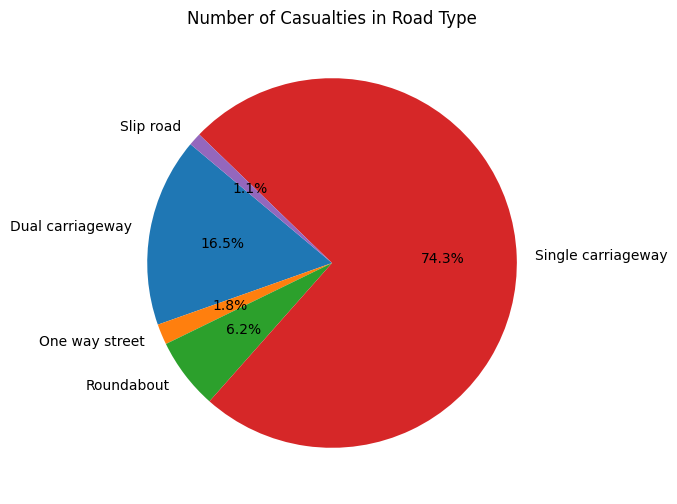

In [14]:
road = df.groupby('Road_Type')['Number_of_Casualties'].sum()

plt.figure(figsize=(8,6))
plt.pie(road.values, labels=road.index, autopct='%1.1f%%', startangle=140)
plt.title("Number of Casualties in Road Type")
plt.show()

## Scatter Chart

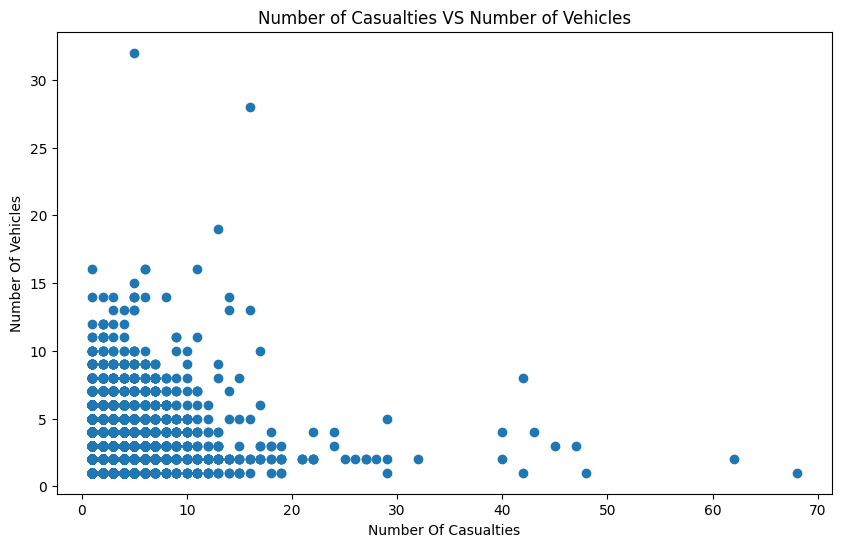

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df['Number_of_Casualties'],df['Number_of_Vehicles'])
plt.title("Number of Casualties VS Number of Vehicles")
plt.xlabel("Number Of Casualties")
plt.ylabel("Number Of Vehicles")
plt.show()

## Donut Chart

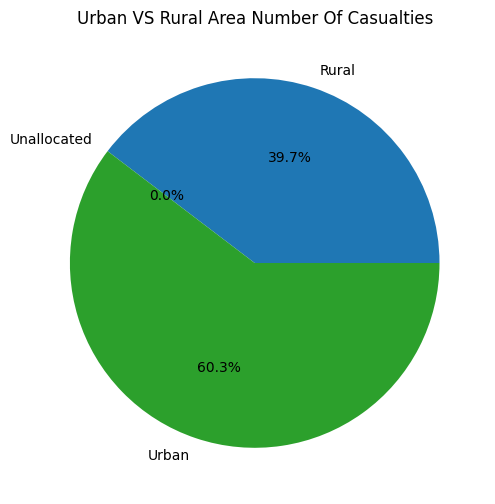

In [20]:
area_casu = df.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].sum()
plt.figure(figsize=(6,6))
plt.pie(area_casu.values, labels=area_casu.index, autopct='%1.1f%%')
plt.title('Urban VS Rural Area Number Of Casualties')
plt.show()

## Bar Chart

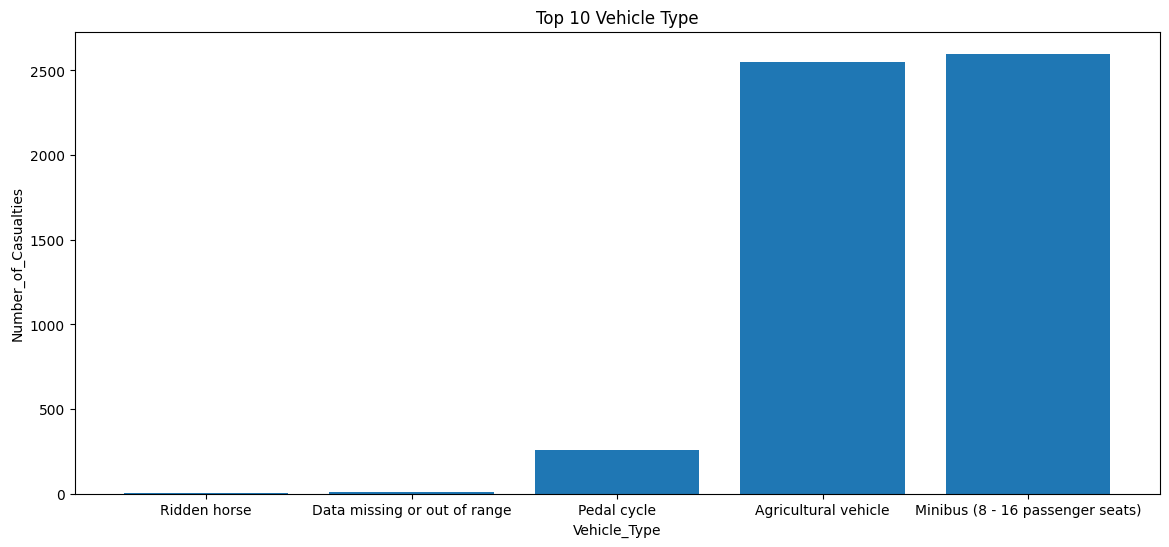

In [23]:
top_10_casu = df.groupby('Vehicle_Type')['Number_of_Casualties'].sum().sort_values(ascending=True).head(5)

plt.figure(figsize=(14,6))
plt.bar(top_10_casu.index, top_10_casu.values)
plt.title("Top 10 Vehicle Type")
plt.xlabel('Vehicle_Type')
plt.ylabel('Number_of_Casualties')
plt.show()